In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data-3.csv')

In [3]:
#changing week to pandas datetime
df['week']=pd.to_datetime(df['week'])

In [4]:
# Feature Engineering: Extract Year, Month, Weekday from 'week',dayof week,dayofyear,quater
df['year'] = df['week'].dt.year
df['month'] = df['week'].dt.month
df['weekday'] = df['week'].dt.weekday
df['dayofweek'] = df['week'].dt.dayofweek
df['dayofyear'] = df['week'].dt.dayofyear
df['quarter'] = df['week'].dt.quarter

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
# Encode categorical features (store_id, sku_id)
label_encoder = LabelEncoder()
df['store_id'] = label_encoder.fit_transform(df['store_id'])
df['sku_id'] = label_encoder.fit_transform(df['sku_id'])

In [6]:
df.set_index('week',inplace=True)

In [7]:
# Features and Target
X = df.drop('units_sold', axis=1)
y = df['units_sold']


In [8]:
#sorting based on week
df=df.sort_values(by='week')


In [9]:
# upto 80%of data make it train and anther 20% below or recent make it test
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [10]:
train_data

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,weekday,dayofweek,dayofyear,quarter
week,,,,,,,,,,,,,,
2011-01-08,47417,75,27,180.2625,213.0375,0,0,21,2011,1,5,5,8,1
2011-01-08,46310,24,2,88.3500,119.7000,0,1,154,2011,1,5,5,8,1
2011-01-08,46311,24,16,86.2125,116.1375,0,1,128,2011,1,5,5,8,1
2011-01-08,46314,24,3,128.9625,128.9625,0,0,38,2011,1,5,5,8,1
2011-01-08,46315,24,0,133.9500,133.9500,0,0,89,2011,1,5,5,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-15,171194,53,10,227.2875,227.2875,0,0,59,2013,1,1,1,15,1
2013-01-15,171333,57,3,118.2750,118.2750,0,0,43,2013,1,1,1,15,1
2013-01-15,171743,75,27,194.5125,191.6625,0,1,22,2013,1,1,1,15,1


In [11]:
X=train_data.drop(['units_sold','record_ID'],axis=1)
y=train_data['units_sold']
X_test=test_data.drop(['units_sold','record_ID'],axis=1)
y_test=test_data['units_sold']

In [12]:
!pip install scikit-learn==1.2.2


In [13]:
#!pip install xgboost==2.1.3 # Version known to be compatible

In [14]:
!pip show xgboost

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 


In [15]:

import xgboost as xgb
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import LabelEncoder
import numpy as np

In [16]:
reg = xgb.XGBRegressor(n_estimators=150,learning_rate=0.01)
reg.fit(X, y,

verbose=100)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Save the model to a file
reg.save_model("xgboost_model.json")

In [ ]:
# Save the model with joblib
#joblib.dump(reg, "xgboost_model_joblib.pkl")

['xgboost_model_joblib.pkl']

In [ ]:
import pickle
with open("xgboost_model_pickle.pkl", "wb") as f:
    pickle.dump(reg, f)

In [ ]:
# import joblib

# # Save the trained model
# joblib.dump(reg, 'xgboost_model.joblib')
# print("Model saved as xgboost_model.joblib")


Model saved as xgboost_model.joblib


In [ ]:
!pip freeze > requirements.txt


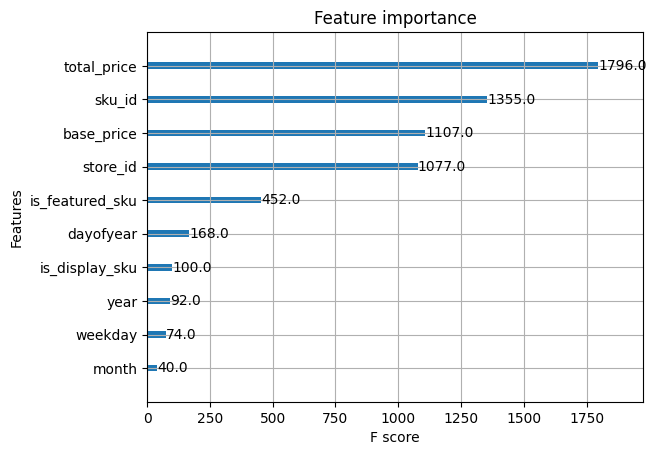

In [ ]:
#feature important
xgb.plot_importance(reg)
plt.show()

In [ ]:
pd.DataFrame(reg.feature_importances_,index=X.columns,columns=['importance']).sort_values('importance',ascending=False)

,importance
is_display_sku,0.763523
is_featured_sku,0.081834
sku_id,0.048069
total_price,0.035753
base_price,0.023997
dayofyear,0.023957
store_id,0.012122
weekday,0.005300
year,0.002824
month,0.002620


In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
y_pred

array([36.155704, 19.91802 , 20.588676, ..., 36.155704, 23.223528,
       30.737955], dtype=float32)

In [ ]:
y_test.values

array([ 40,  44,  62, ..., 128,  63,  34])

In [ ]:
#subracting acutal sales - predicted sales
error=abs(y_test.values-y_pred)

In [ ]:
error

array([ 3.8442955 , 24.08197975, 41.41132355, ..., 91.8442955 ,
       39.77647209,  3.26204491])

In [ ]:
#sort descending error to find max
error.min()

0.002330780029296875

In [ ]:
test_data.iloc[error.argmin()]

,2013-11-06
record_ID,204779.0000
store_id,14.0000
sku_id,14.0000
total_price,375.4875
base_price,483.7875
is_featured_sku,1.0000
is_display_sku,1.0000
units_sold,24.0000
year,2013.0000
month,11.0000


In [ ]:
y_test.values

array([ 40,  44,  62, ..., 128,  63,  34])

In [ ]:
len(error)

30030

In [ ]:
y_pred.max()

175.12689

In [ ]:
y_test.max()

880

In [ ]:
y_test.values.max()

880

In [ ]:
y_test

,units_sold
week,
2013-01-22,40
2013-01-22,44
2013-01-22,62
2013-01-22,44
2013-01-22,177
...,...
2013-12-03,87
2013-12-03,102
2013-12-03,128


In [ ]:
X_test

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,year,month,weekday,dayofweek,dayofyear,quarter
week,,,,,,,,,,,,
2013-01-22,3,2,104.0250,104.0250,0,0,2013,1,1,1,22,1
2013-01-22,53,12,236.5500,236.5500,0,0,2013,1,1,1,22,1
2013-01-22,53,13,230.8500,230.8500,0,0,2013,1,1,1,22,1
2013-01-22,53,11,240.8250,240.8250,0,0,2013,1,1,1,22,1
2013-01-22,53,10,176.7000,227.2875,1,1,2013,1,1,1,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-03,24,3,116.8500,131.8125,0,1,2013,12,1,1,337,4
2013-12-03,24,16,109.0125,106.8750,0,1,2013,12,1,1,337,4
2013-12-03,24,2,109.0125,109.0125,0,0,2013,12,1,1,337,4


In [ ]:
error.max()

759.348503112793

In [ ]:
mean_squared_error(y_pred,y_test)

896.5173394282887

In [ ]:
X.columns

Index(['store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku',
       'is_display_sku', 'year', 'month', 'weekday', 'dayofweek', 'dayofyear',
       'quarter'],
      dtype='object')

In [ ]:
pip show